In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ubaydullayevno1","key":"adead398ea69ce56a9d87675ae180faf"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d atharvaingle/crop-recommendation-dataset

Dataset URL: https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset
License(s): apache-2.0
  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 77.0MB/s]


In [ ]:
!unzip /content/crop-recommendation-dataset.zip

Archive:  /content/crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Dataset tuzilishini ko'rib chiqish
print("Dataset ma'lumotlari:")
print(df.info())

Dataset ma'lumotlari:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
# Statistik ko'rsatkichlarni chiqarish
print("Datasetning statistik tavsifi:")
print(df.describe())


Datasetning statistik tavsifi:
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.56011

Random Forest algoritmi qo'llaymiz

In [ ]:
# Etishmayotgan qiymatlarni tekshirish
print("Etishmayotgan qiymatlar:")
print(df.isnull().sum())

Etishmayotgan qiymatlar:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


Ma'lumotlarni tayyorlash va bo'lish

In [ ]:
# Kerakli ustunlarni tanlash (N, P, K, temperature, humidity, ph, rainfall)
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']  # Bu yerda 'label' ustuni ekin tavsiyasini bildiradi

# Trening va test to'plamlariga bo'lish (20% test to'plami)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest modelini yaratish
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Modelni trening to'plamida o'qitish
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
import pickle

# Modelni saqlash (dump qilish)
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Modelni yuklash (load qilish)
with open("random_forest_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


# Yuklangan model yordamida bashorat qilish
manual_data = np.array([[90, 42, 43, 20.87974371, 82.00274423, 6.502985292, 202.9355362]])
print("Yuklangan modelning bashorati:", loaded_model.predict(manual_data))



Yuklangan modelning bashorati: ['rice']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import pickle

# Load the trained model
with open("random_forest_model.pkl", "rb") as f:
    model = pickle.load(f)

# Define a function to get crop recommendations
def get_crop_recommendations(N, P, K, temperature, humidity, ph, rainfall):
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = model.predict(input_data)[0]

    # Get probabilities for all crops
    probabilities = model.predict_proba(input_data)[0]

    # Sort crops based on probabilities and get top 3
    crop_probabilities = dict(zip(model.classes_, probabilities))
    sorted_crops = sorted(crop_probabilities.items(), key=lambda item: item[1], reverse=True)
    top_3_crops = [crop[0] for crop in sorted_crops[:3]]

    return prediction, top_3_crops

# Streamlit app
st.title("Crop Recommendation System")

# Input fields for soil properties
N = st.number_input("Nitrogen (N)", min_value=0, max_value=140, value=50)
P = st.number_input("Phosphorus (P)", min_value=5, max_value=145, value=50)
K = st.number_input("Potassium (K)", min_value=5, max_value=205, value=50)
temperature = st.number_input("Temperature (°C)", min_value=8.0, max_value=44.0, value=25.0)
humidity = st.number_input("Humidity (%)", min_value=14.0, max_value=100.0, value=60.0)
ph = st.number_input("pH", min_value=3.5, max_value=9.9, value=6.5)
rainfall = st.number_input("Rainfall (mm)", min_value=20.0, max_value=300.0, value=100.0)

# Make prediction when button is clicked
if st.button("Predict"):
    predicted_crop, top_3_crops = get_crop_recommendations(N, P, K, temperature, humidity, ph, rainfall)

    st.success(f"**Most Suitable Crop:** {predicted_crop}")
    st.info(f"**Top 3 Recommendations:** {', '.join(top_3_crops)}")




BAHOLASH

Model aniqligi: 1.0
Klassifikatsiya hisobot:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         9
      banana       1.00      1.00      1.00        12
   blackgram       1.00      1.00      1.00        13
    chickpea       1.00      1.00      1.00        13
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00         9
      cotton       1.00      1.00      1.00         6
      grapes       1.00      1.00      1.00         8
        jute       1.00      1.00      1.00        11
 kidneybeans       1.00      1.00      1.00        13
      lentil       1.00      1.00      1.00         7
       maize       1.00      1.00      1.00        12
       mango       1.00      1.00      1.00         4
   mothbeans       1.00      1.00      1.00        11
    mungbean       1.00      1.00      1.00        10
   muskmelon       1.00      1.00      1.00         7
      orange       1.00      1.00   

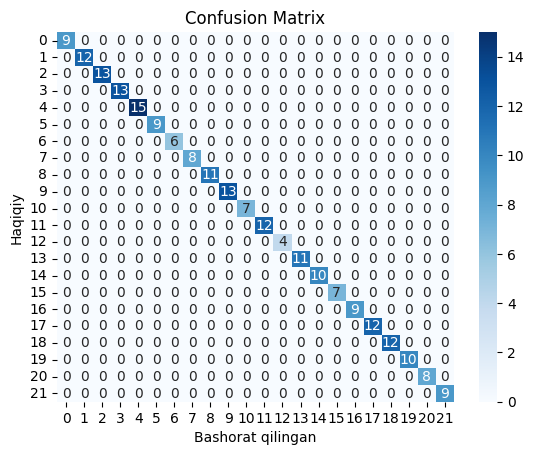

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Test to'plamida bashorat qilish
y_pred = rf.predict(X_test)

# Model aniqligini o'lchash
accuracy = accuracy_score(y_test, y_pred)
print("Model aniqligi:", accuracy)

# Batafsil hisobot
print("Klassifikatsiya hisobot:")
print(classification_report(y_test, y_pred))

# Confusion Matrix-ni chizish
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Bashorat qilingan")
plt.ylabel("Haqiqiy")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Qo'lda kiritilgan ma'lumotlar: N, P, K, temperature, humidity, ph, rainfall
# Masalan, quyidagi qiymatlarni kiritamiz:
manual_data = np.array([[90, 42, 43, 20.87974371, 82.00274423, 6.502985292, 202.9355362]])

# Model yordamida bashorat qilish
manual_prediction = rf.predict(manual_data)
print("Qo'lda kiritilgan ma'lumotlar uchun tavsiya etilgan label:", manual_prediction[0])


Qo'lda kiritilgan ma'lumotlar uchun tavsiya etilgan label: rice


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
importances = rf.feature_importances_
features = X.columns

for feature, importance in zip(features, importances):
    print(f"{feature}: {importance:.3f}")


N: 0.101
P: 0.157
K: 0.176
temperature: 0.073
humidity: 0.215
ph: 0.053
rainfall: 0.225
